In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
sales=pd.read_csv('data/data_raw.csv')
sales

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135.0,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102.0,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110.0,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127.0,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84.0,True,black,8.83,6,06.Mobile phone accessories
...,...,...,...,...,...,...,...,...
4395,2018-08-27,44,20.0,False,black,53.99,6,09.Smartphone stands
4396,2018-09-03,44,14.0,False,NaN,52.99,6,09.Smartphone stands
4397,2018-09-10,44,22.0,True,black,44.99,6,09.Smartphone stands
4398,2018-09-17,44,28.0,True,NaN,42.99,6,09.Smartphone stands


In [3]:
sales.color.nunique()

10

In [4]:
sales.vendor.nunique()

10

In [5]:
sales.functionality.nunique()

12

## Data Exploration

In [6]:
sales.dtypes

week               object
sku                 int64
weekly_sales      float64
feat_main_page       bool
color              object
price             float64
vendor              int64
functionality      object
dtype: object

In [7]:
sales_stat = sales.describe()
sales_stat

,sku,weekly_sales,price,vendor
count,4400.000000,4400.000000,4400.000000,4400.000000
mean,22.500000,83.054773,44.432709,6.909091
std,12.699868,288.000205,42.500295,2.503175
min,1.000000,0.000000,2.390000,1.000000
25%,11.750000,11.000000,15.680000,6.000000
50%,22.500000,25.000000,27.550000,6.500000
75%,33.250000,70.000000,54.990000,9.000000
max,44.000000,7512.000000,227.720000,10.000000


In [8]:
sales.describe(include = ["bool","object"])

,week,feat_main_page,color,functionality
count,4400,4400,4390,4400
unique,100,2,10,12
top,2016-10-31,False,black,06.Mobile phone accessories
freq,44,2825,1691,1100


In [9]:
sales.feat_main_page.value_counts()

feat_main_page
False    2825
True     1575
Name: count, dtype: int64

In [10]:
sales.color.value_counts()

color
black     1691
blue       700
red        500
green      400
grey       300
white      200
none       200
gold       199
purple     100
pink       100
Name: count, dtype: int64

In [11]:
sales.vendor.value_counts()

vendor
6     1200
10    1000
8      800
5      400
9      300
1      200
3      200
2      100
4      100
7      100
Name: count, dtype: int64

In [12]:
sales.functionality.value_counts()

functionality
06.Mobile phone accessories        1100
04.Selfie sticks                    700
09.Smartphone stands                600
02.Portable smartphone chargers     500
01.Streaming sticks                 400
07.Headphones                       200
11.Fitness trackers                 200
08.Digital pencils                  200
12.Flash drives                     200
03.Bluetooth speakers               100
10.VR headset                       100
05.Bluetooth tracker                100
Name: count, dtype: int64

In [14]:
avg = sales.groupby("week")[["weekly_sales", "price"]].mean().reset_index()
avg


,week,weekly_sales,price
0,2016-10-31,62.659091,42.964773
1,2016-11-07,61.227273,40.994318
2,2016-11-14,63.431818,41.340227
3,2016-11-21,58.431818,40.385000
4,2016-11-28,63.090909,40.060000
...,...,...,...
95,2018-08-27,97.409091,48.551591
96,2018-09-03,60.250000,47.006136
97,2018-09-10,125.340909,45.054091
98,2018-09-17,194.363636,43.186364


In [15]:
color=sns.color_palette(palette='colorblind')[3]

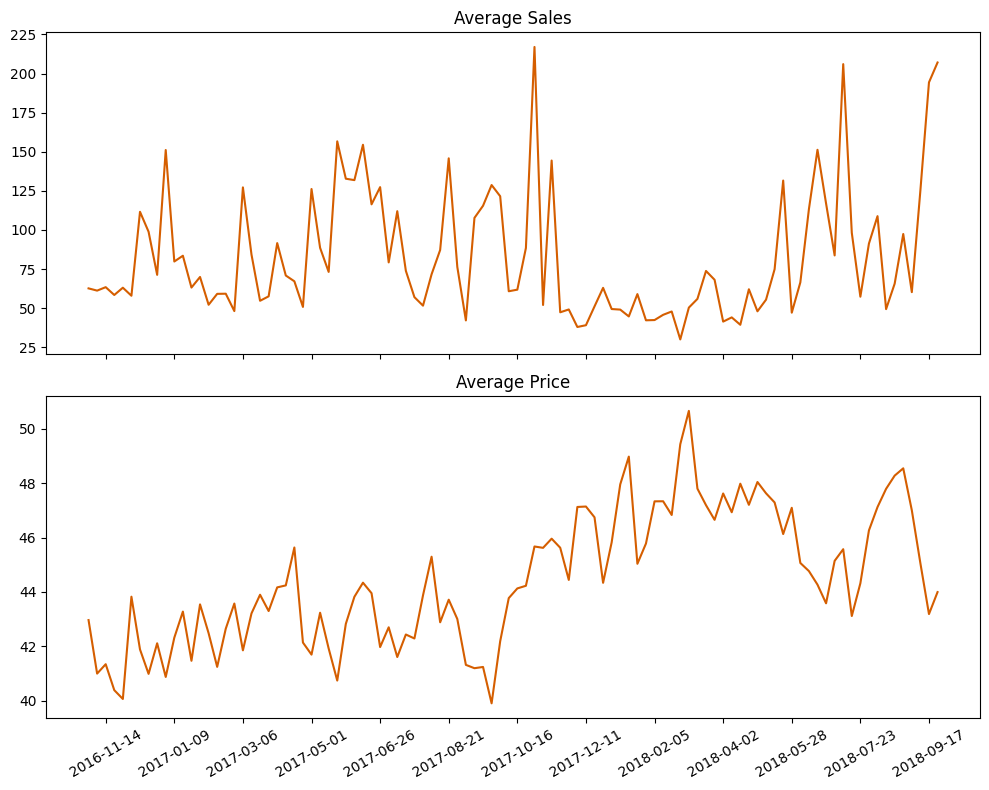

In [16]:
# Simple data to display in various forms
x = avg["week"]
y = avg["weekly_sales"]
z= avg["price"]

plt.rcParams["figure.figsize"] = (10,8)
f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(x, y,color=color)
plt.xticks(rotation=30)
axarr[0].set_title('Average Sales')
axarr[0].set(xticks=avg.week[2::8])

axarr[1].plot(x, z,color=color)
plt.xticks(rotation=30)
axarr[1].set_title('Average Price')
axarr[1].set(xticks=avg.week[2::8])
plt.tight_layout()
plt.show()

#plt.savefig("Average_P_S.png",dpi=400,bbox_inches = 'tight')



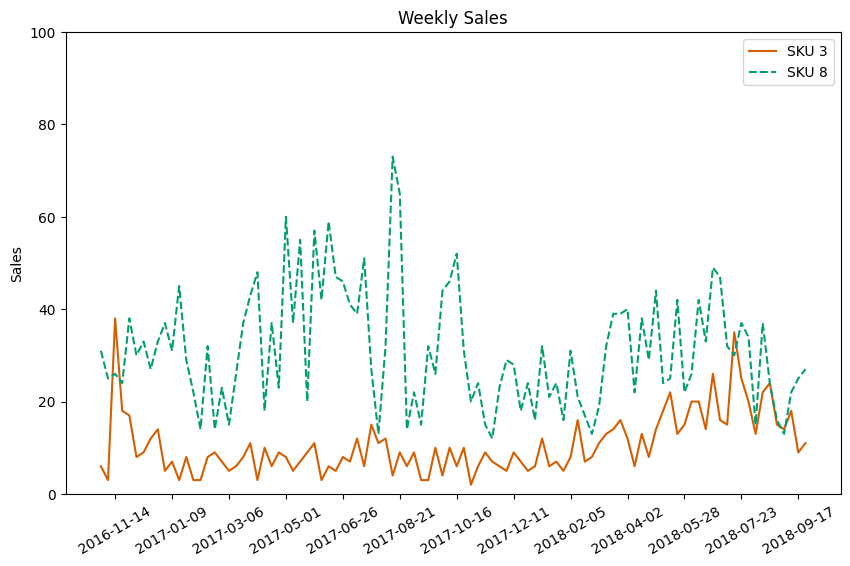

In [17]:
plt.figure(figsize=(10,6))

plt.plot(sales[sales.sku==3]["week"],sales[sales.sku==3]["weekly_sales"],color=sns.color_palette(palette='colorblind')[3],label="SKU 3")
plt.plot(sales[sales.sku==8]["week"],sales[sales.sku==8]["weekly_sales"],color=sns.color_palette(palette='colorblind')[2],label="SKU 8",linestyle='dashed')
plt.title('Weekly Sales')
plt.ylabel("Sales")
plt.legend()
plt.ylim(0,100)

locs, labels=plt.xticks()
x_ticks = []

plt.xticks(locs[2::8],avg.week[2::8], rotation=30)
# plt.savefig("Sales_2.png",dpi=400,bbox_inches = 'tight')
plt.show()

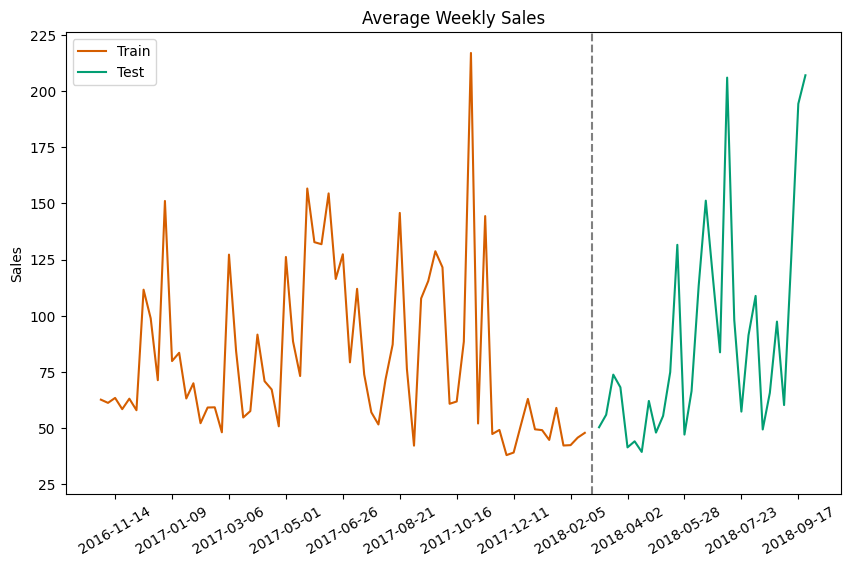

In [18]:
plt.figure(figsize=(10,6))

plt.plot(avg.iloc[:69]["week"],avg.iloc[:69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[3],label="Train")
plt.plot(avg.iloc[69]["week"],avg.iloc[69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[1])

plt.plot(avg.iloc[70:]["week"],avg.iloc[70:]["weekly_sales"],color=sns.color_palette(palette='colorblind')[2],label="Test")
plt.title('Average Weekly Sales')
plt.ylabel("Sales")
plt.axvline(x=avg.iloc[69]["week"],color='gray',linestyle='--')
plt.legend()

locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[2::8],avg.week[2::8], rotation=30)

# plt.savefig("Sales_split.png",dpi=400,bbox_inches = 'tight')
plt.show()

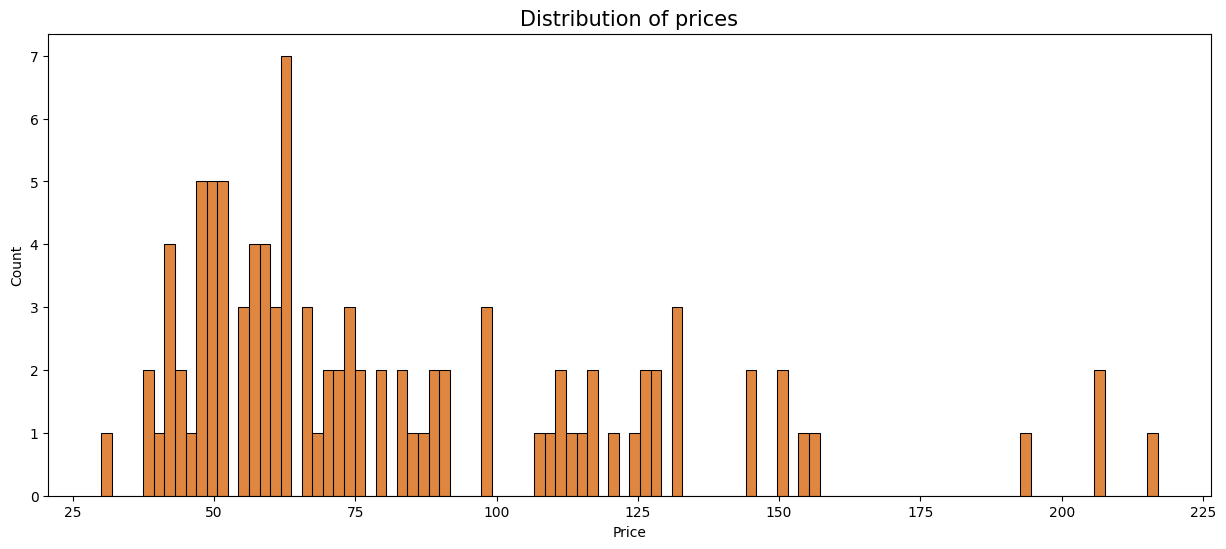

In [19]:
plt.figure(figsize=(15,6))
graph = sns.histplot(data=avg["weekly_sales"],bins=100, color=color)
plt.title('Distribution of prices', fontsize=15)
graph.set(xlabel = "Price")

# plt.savefig("price_distrib.png",dpi=400)
plt.show()

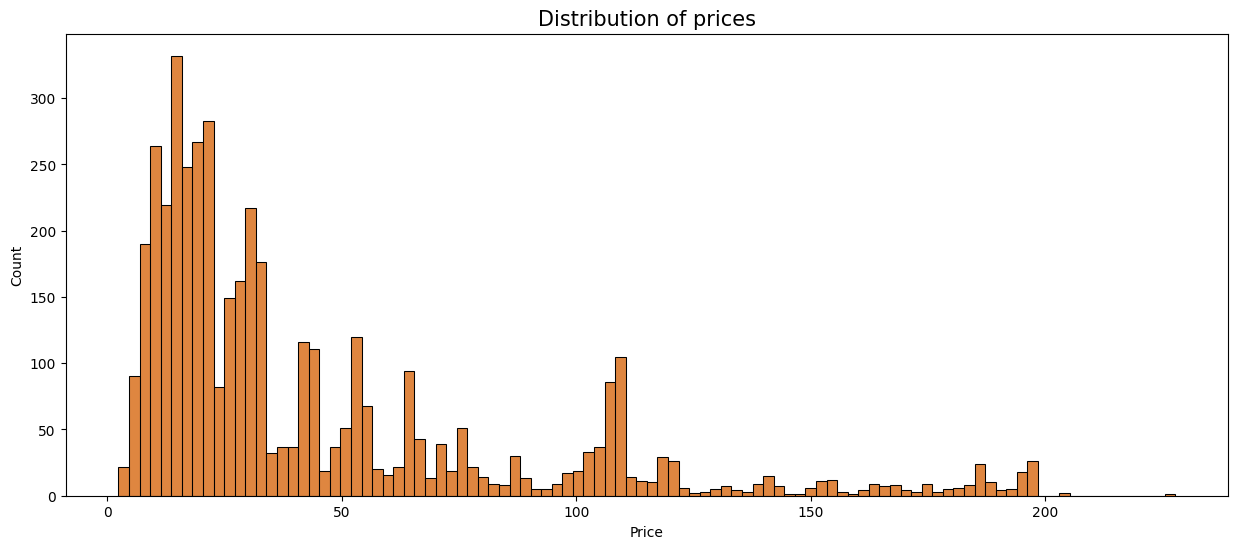

In [20]:
plt.figure(figsize=(15,6))
graph = sns.histplot(data=sales["price"],bins=100, color=color)
plt.title('Distribution of prices', fontsize=15)
graph.set(xlabel = "Price")

# plt.savefig("price_distrib.png",dpi=400)
plt.show()